# PHASE 1 GRADED CHALLENGE 3

# **I. INTRODUCTION**

Hello everybody! A warm welcome from me to you, welcome to my notebook. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## 1.1 ABOUT THE DATA

The dataset that I will analyze was obtained through BigQuery Google. To obtain the data you need to put this credentials on Google BigQuery:

* Project ID : `ftds-hacktiv8-project`
* Dataset Name : `phase1_ftds_001_hck`
* Table Name : `heart-failure`

This data containing the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

The dataset contains 13 features, which report clinical, body, and lifestyle information, that we briefly describe here. Some features are binary: anaemia, high blood pressure, diabetes, sex, and smoking. The hospital physician considered a patient having anaemia if haematocrit levels were lower than 36%. Unfortunately, the original dataset manuscript provides no definition of high blood pressure.

Regarding the features, the creatinine phosphokinase (CPK) states the level of the CPK enzyme in blood. When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury. The ejection fraction states the percentage of how much blood the left ventricle pumps out with each contraction. The serum creatinine is a waste product generated by creatine, when a muscle breaks down. Especially, doctors focus on serum creatinine in blood to check kidney function. If a patient has high levels of serum creatinine, it may indicate renal dysfunction. Sodium is a mineral that serves for the correct functioning of muscles and nerves. The serum sodium test is a routine blood exam that indicates if a patient has normal levels of sodium in the blood. An abnormally low level of sodium in the blood might be caused by heart failure. The death event feature, that we use as the target in our binary classification study, states if the patient died or survived before the end of the follow-up period, that was 130 days on average.  Regarding the dataset imbalance, the survived patients (death event = 0) are 203, while the dead patients (death event = 1) are 96. In statistical terms, there are 32.11% positives and 67.89% negatives.

|           **Feature**          |                      **Explanation**                      |  **Measurement** |      **Range**      |
|:------------------------------:|:---------------------------------------------------------:|:----------------:|:-------------------:|
|               Age              | Age of the patient                                        |       Years      | [40,..., 95]        |
|             Anaemia            | Decrease of red blood cells or hemoglobin                 |      Boolean     | 0=No, 1=Yes                |
|       High blood pressure      | If a patient has hypertension                             |      Boolean     | 0=No, 1=Yes                |
| Creatinine phosphokinase (CPK) | Level of the CPK enzyme in the blood                      |       mcg/L      | [23,..., 7861]      |
|            Diabetes            | If the patient has diabetes                               |      Boolean     | 0=No, 1=Yes                |
|        Ejection fraction       | Percentage of blood leaving the heart at each contraction |    Percentage    | [14,..., 80]        |
|               Sex              | Woman or man                                              |      Binary      | 0=Woman, 1=Man                |
|            Platelets           | Platelets in the blood                                    | kiloplatelets/mL | [25.01,..., 850.00] |
|        Serum creatinine        | Level of creatinine in the blood                          |       mg/dL      | [0.50,..., 9.40]    |
|          Serum sodium          | Level of sodium in the blood                              |       mEq/L      | [114,..., 148]      |
|             Smoking            | If the patient smokes                                     |      Boolean     | 0=No, 1=Yes                |
|              Time              | Follow-up period                                          |       Days       | [4,...,285]         |
|      (target) death event      | If the patient died during the follow-up period           |      Boolean     | 0=No, 1=Yes                |

## 1.2 OBJECTIVES

The objective of this project is to apply several machine learning classifiers to both predict the patients survival, and rank the features corresponding to the most important risk factors.

# **II. IMPORT LIBRARIES**

I like my notebook to be neat and tidy, so this section is used for importing all the libraries that I am going to use throughout this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# **III. DATA LOADING**

The following is the query I use to retrieve the data needed for this project

~~~~sql
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.heart-failure`
~~~~

Alright, the next step is to load the data into the notebook. I will assign the dataset into a variable named `df`.

In [2]:
df = pd.read_csv('h8dsft_P1G3_AlexanderPrasetyoC.csv')

And here is the preview of `df`, first 5 entries and last 5 entries.

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


# **IV. DATA CLEANING**

Doing data cleaning before starting the analysis has become an obligation, otherwise I will be sinning. Therefore, I will do a check on `df` whether there is a missing value. I will not do duplicate entries checking because, in my opinion, in this dataset, each entry is a unique entry (representing 1 person) and does not rule out the possibility that everyone has the same data.

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The dataset that I have turned out to be on my side, **there is no missing value at all** in my dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Some column names in my opinion are too long, so I want to change some column names to make it easier for me to work on this project. The column names to be replaced are:

- creatinine_phosphokinase -> cpk
- ejection_fraction -> ef
- high_blood_pressure -> hbp
- serum_creatinine -> sCre
- serum_sodium -> sSod

Also, I will change the value of platelets according to the platelets unit contained in the data dictionary.

In [7]:
df.rename(columns={'creatinine_phosphokinase':'cpk',
                   'ejection_fraction':'ef',
                   'high_blood_pressure':'hbp',
                   'serum_creatinine':'sCre',
                   'serum_sodium':'sSod'} , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    float64
 1   anaemia      299 non-null    int64  
 2   cpk          299 non-null    int64  
 3   diabetes     299 non-null    int64  
 4   ef           299 non-null    int64  
 5   hbp          299 non-null    int64  
 6   platelets    299 non-null    float64
 7   sCre         299 non-null    float64
 8   sSod         299 non-null    int64  
 9   sex          299 non-null    int64  
 10  smoking      299 non-null    int64  
 11  time         299 non-null    int64  
 12  DEATH_EVENT  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.platelets = df.platelets/1000

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
cpk,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ef,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
hbp,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263.358029,97.804237,25.1,212.5,262.0,303.5,850.0
sCre,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
sSod,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    float64
 1   anaemia      299 non-null    int64  
 2   cpk          299 non-null    int64  
 3   diabetes     299 non-null    int64  
 4   ef           299 non-null    int64  
 5   hbp          299 non-null    int64  
 6   platelets    299 non-null    float64
 7   sCre         299 non-null    float64
 8   sSod         299 non-null    int64  
 9   sex          299 non-null    int64  
 10  smoking      299 non-null    int64  
 11  time         299 non-null    int64  
 12  DEATH_EVENT  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Now, I want to make a copy of the new revised `df` for the purpose of my exploratory data analysis.

In [11]:
df_copy = df.copy()

In [12]:
df_copy['platelets'] = df_copy.platelets.astype('int64')

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    float64
 1   anaemia      299 non-null    int64  
 2   cpk          299 non-null    int64  
 3   diabetes     299 non-null    int64  
 4   ef           299 non-null    int64  
 5   hbp          299 non-null    int64  
 6   platelets    299 non-null    int64  
 7   sCre         299 non-null    float64
 8   sSod         299 non-null    int64  
 9   sex          299 non-null    int64  
 10  smoking      299 non-null    int64  
 11  time         299 non-null    int64  
 12  DEATH_EVENT  299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


# **V. EXPLORATORY DATA ANALYSIS (EDA)**

For data context, I will write down again the revised data dictionary.

|           **Feature**          |                      **Explanation**                      |  **Measurement** |      **Range**      |
|:------------------------------:|:---------------------------------------------------------:|:----------------:|:-------------------:|
|               age              | Age of the patient                                        |       Years      | [40,..., 95]        |
|             anaemia            | Decrease of red blood cells or hemoglobin                 |      Boolean     | 0=No, 1=Yes                |
|       hbp      | If a patient has hypertension                             |      Boolean     | 0=No, 1=Yes                |
| cpk | Level of the CPK enzyme in the blood                      |       mcg/L      | [23,..., 7861]      |
|            diabetes            | If the patient has diabetes                               |      Boolean     | 0=No, 1=Yes                |
|        ef       | Percentage of blood leaving the heart at each contraction |    Percentage    | [14,..., 80]        |
|               sex              | Woman or man                                              |      Binary      | 0=Woman, 1=Man                |
|            platelets           | Platelets in the blood                                    | kiloplatelets/mL | [25.01,..., 850.00] |
|        sCre        | Level of creatinine in the blood                          |       mg/dL      | [0.50,..., 9.40]    |
|          sSod          | Level of sodium in the blood                              |       mEq/L      | [114,..., 148]      |
|             smoking            | If the patient smokes                                     |      Boolean     | 0=No, 1=Yes                |
|              time              | Follow-up period                                          |       Days       | [4,...,285]         |
|      (target) DEATH_EVENT      | If the patient died during the follow-up period           |      Boolean     | 0=No, 1=Yes                |

In this exploratory data analysis, I will explore on categorical features first and then move on to numerical features. In this section, I will try to gain any insights and informations that I may obtained.

## 5.1 Target Visualization

Now, I will visualize the count of unique class in the target.

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


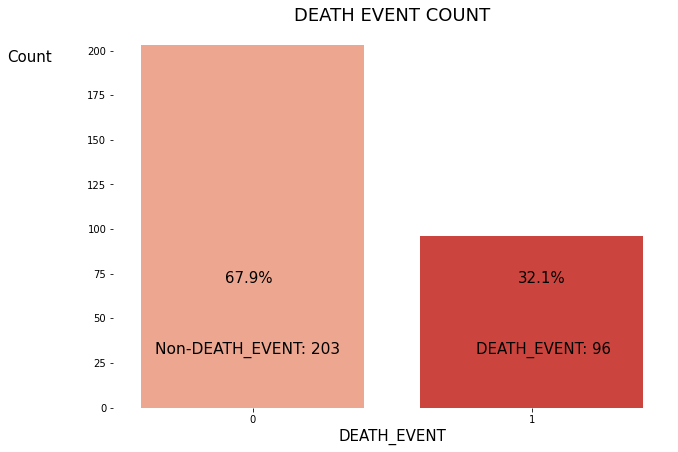

In [14]:
DEATH_EVENT = df['DEATH_EVENT'].sum()
NO_DEATH_EVENT = len(df['DEATH_EVENT']) - DEATH_EVENT

DEATH_EVENT_perc = round(DEATH_EVENT/len(df['DEATH_EVENT']) * 100, 1)
NO_DEATH_EVENT_perc = round(NO_DEATH_EVENT/len(df['DEATH_EVENT']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('DEATH_EVENT', data = df, palette='Reds')
plt.annotate(f'Non-DEATH_EVENT: {NO_DEATH_EVENT}', 
             xy=(-0.35, 30),
            size=15.5)

plt.annotate('DEATH_EVENT: {}'.format(DEATH_EVENT), 
             xy=(0.8, 30),
            size=15)

plt.annotate('{}%'.format(NO_DEATH_EVENT_perc), xy=(-0.1, 70),size=15)
plt.annotate('{}%'.format(DEATH_EVENT_perc), xy=(0.95, 70),size=15)
plt.title('DEATH EVENT COUNT', size=18)
plt.xlabel("DEATH_EVENT",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.15,.9)
plt.box(False)

The graph above tells us that it turns out there is a **class imbalance in the target variable**.

## 5.2 Frequency of Explanatory Variables by Death Events

The features in this dataset can be categorized into two types, which is categorical and numerical features.

The categorical features are : `anaemia`, `diabetes`, `hbp`, `sex`, `smoking`, `DEATH_EVENT`.<br>
The numerical features are : `age`, `cpk`, `ef`, `platelets`, `sCre`, `sSod`, `time`.


### 5.2.1 Categorical Explanatory Variables

In [15]:
df_categorical = df[['anaemia','diabetes','hbp','sex','smoking', 'DEATH_EVENT']]

In [16]:
cat_feat_for_eda = ["anaemia", "diabetes", "hbp", "sex", "smoking"]

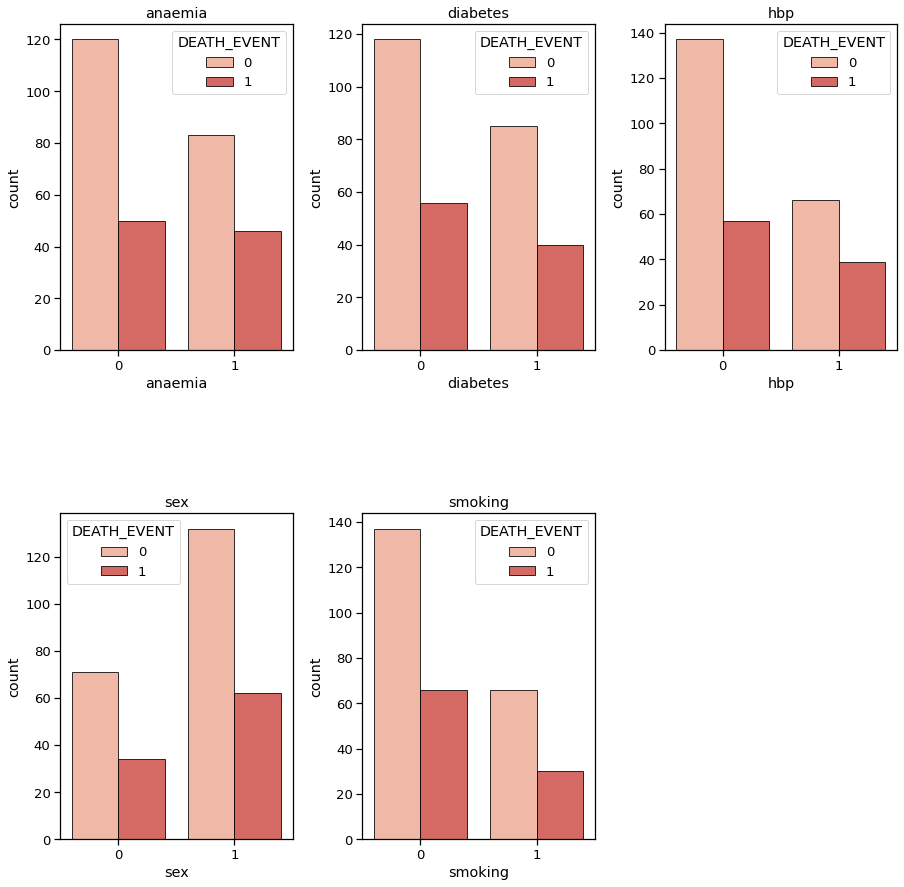

In [17]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cat_feat_for_eda):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=df, x=col, hue="DEATH_EVENT", palette = "Reds", alpha=0.8, edgecolor="k", linewidth=1)

From the graphs above, the following are my observations:


- 56.9% are NON ANAEMIC (out of which 40.1% survived and 16.8% died) and 43.1% are ANAEMIC (out of which 27.9% survived and 15.2% died). The chance of not surviving heart failure of diagnosed and non diagnosed are kind of similar.

- 57.9% are NON DIABETIC (out of which 39.4% survived and 18.5% died) and 42.1% are DIABETIC (out of which 28.6% survived and 13.5% died).

- 65% do not have HIGH BLOOD PRESSURE (out of which 45.8% survived and 19.2% died) and 35% have HIGH BLOOD PRESSURE (out of which 22.2% survived and 12.8% died ).

- 65.3% are MALE (out of which 44.4% survived and 20.9% died) and 34.7% are FEMALE (out of which 23.6% survived and 11.1% died).

- 67.7% do not SMOKE (out of which 45.8% survived and 21.9% died) and 32.3% do SMOKE (out of which 22.2% survived and 10.1% died). It is clear that the mortality rate of smokers is much lower than that of non-smokers. But here we need to be careful. Because it is known to everyone that under normal circumstances, the death rate of people who smoke is high. The problem here is with my dataset. Because the number of smokers in our dataset is high and the number of deaths is low. Hence the inconsistency.

### 5.2.2 Numerical Explanatory Variables

In this section I will try to explore around the numericalc features and try to find if these features are affecting the survival rate from heart failure.

Here is the numerical features: `age`, `cpk`, `ef`, `platelets`, `sCre`, `sSod`, `time`.

#### 5.2.2.1 Age VS Death Event

Because the age values in this dataset vary, ranging from 40 years to 95 years, I will group people's ages per 10 years to make it easier to read the graph that I will visualize.

In [18]:
df_copy['age'] = pd.cut(df_copy['age'],[40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
print(df_copy['age'].value_counts())

(55, 60]    50
(60, 65]    48
(50, 55]    38
(45, 50]    37
(65, 70]    37
(40, 45]    30
(70, 75]    22
(75, 80]    12
(80, 85]    10
(85, 90]     5
(90, 95]     3
Name: age, dtype: int64


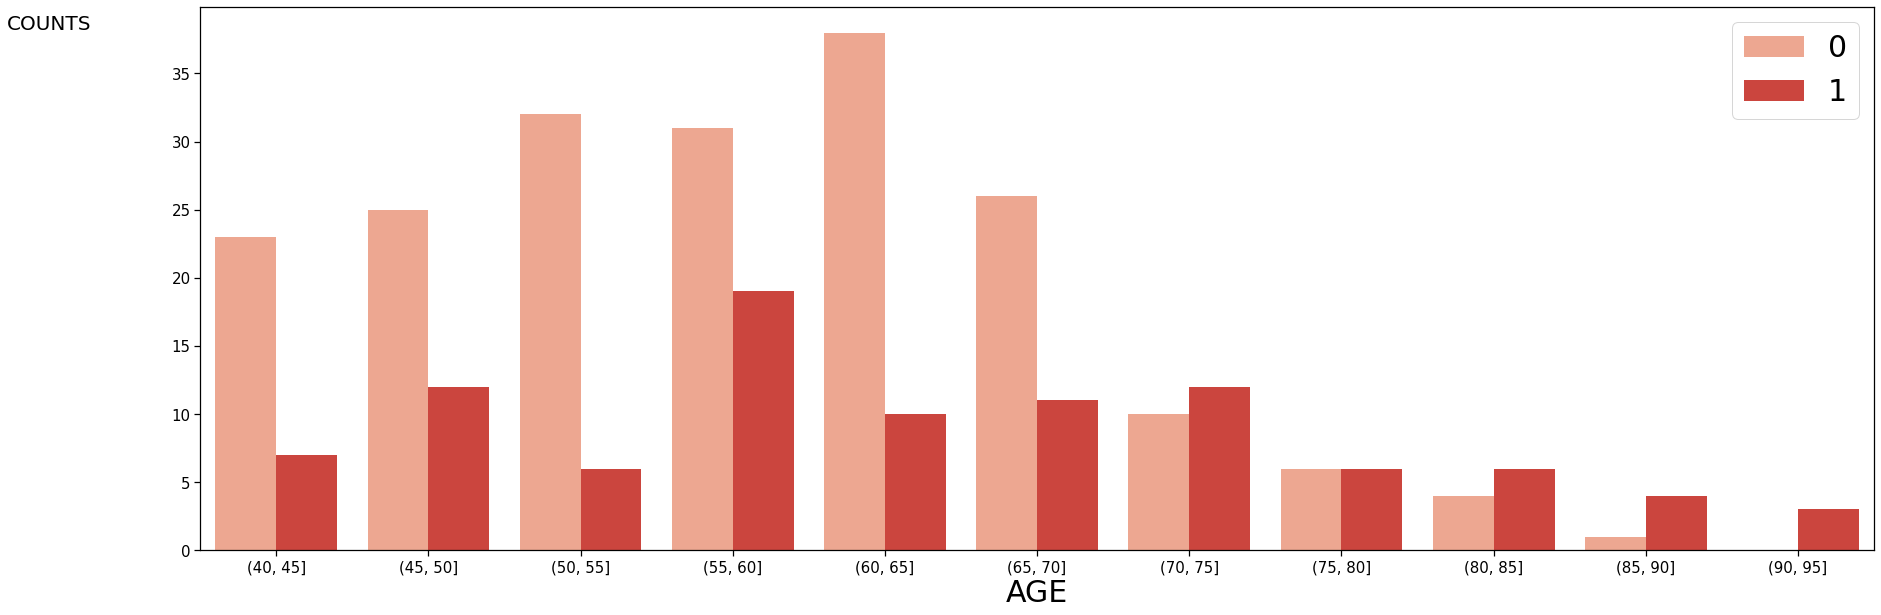

In [19]:
# By Age
fig, axz = plt.subplots(figsize=(30,10))

axz = sns.countplot(x='age', hue='DEATH_EVENT', data=df_copy, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('AGE', size=30)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

From the graph above, we can observe that the values of the `age` variable are mostly distributed as values of 50, 60 and 65 - 70. In addition, there are many peaks in the distribution graph of the `age` variable. This is an indicator that the values of the variable are not normally distributed. Survival of heart failure is high on 40 y/o to 70 y/o, but the spread of Not survival is going through all ages.


#### 5.2.2.2 Creatinine phosphokinase (CPK) VS Death Event

Just like the discussion in the previous session, I will group the CPK values per thousand because the values vary up to 8000. This is done to make reading the graph easier.

In [20]:
df_copy['cpk'] = pd.cut(df_copy['cpk'],[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
print(df_copy['cpk'].value_counts())

(0, 1000]       263
(1000, 2000]     18
(2000, 3000]     11
(3000, 4000]      2
(5000, 6000]      2
(7000, 8000]      2
(4000, 5000]      1
(6000, 7000]      0
Name: cpk, dtype: int64


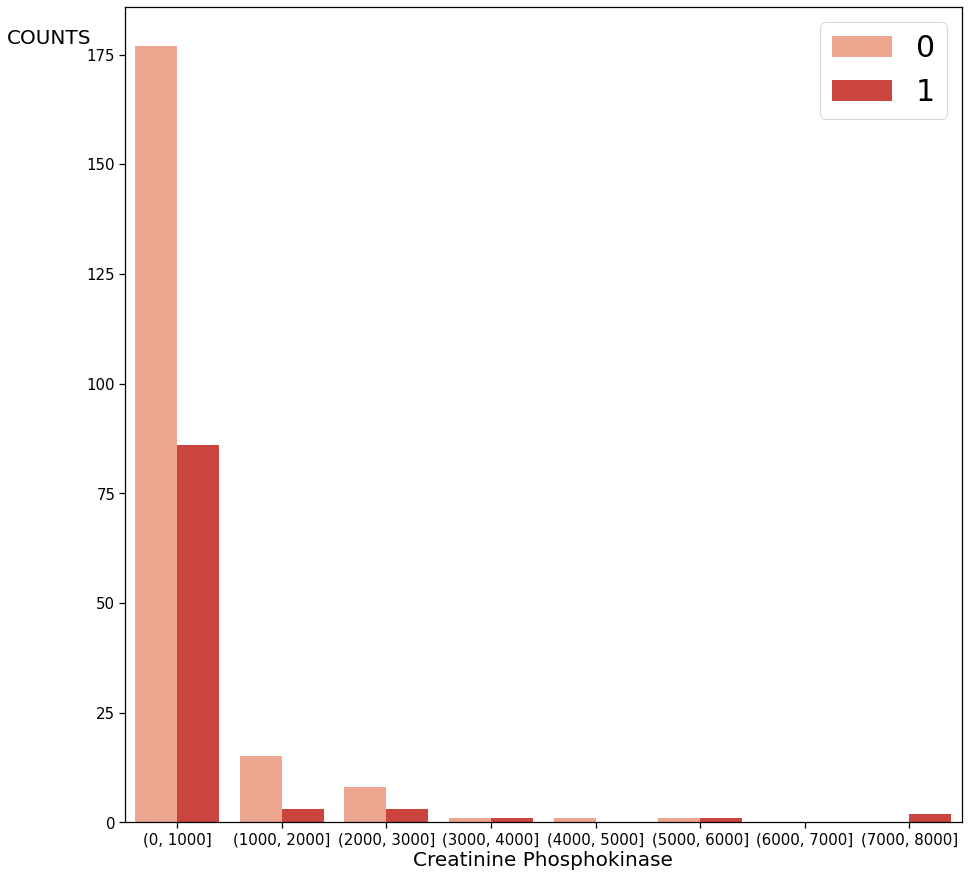

In [21]:
fig, axz = plt.subplots(figsize=(15,15))

axz = sns.countplot(x='cpk', hue='DEATH_EVENT', data=df_copy, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('Creatinine Phosphokinase', size=20)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

Based on my research total CPK normal values: 10 to 120 micrograms per liter (mcg/L). But based on this dataset, there are people who are actually has CPK value above normal margin and still survived.

#### 5.2.2.3 Ejection Fraction VS Death Event

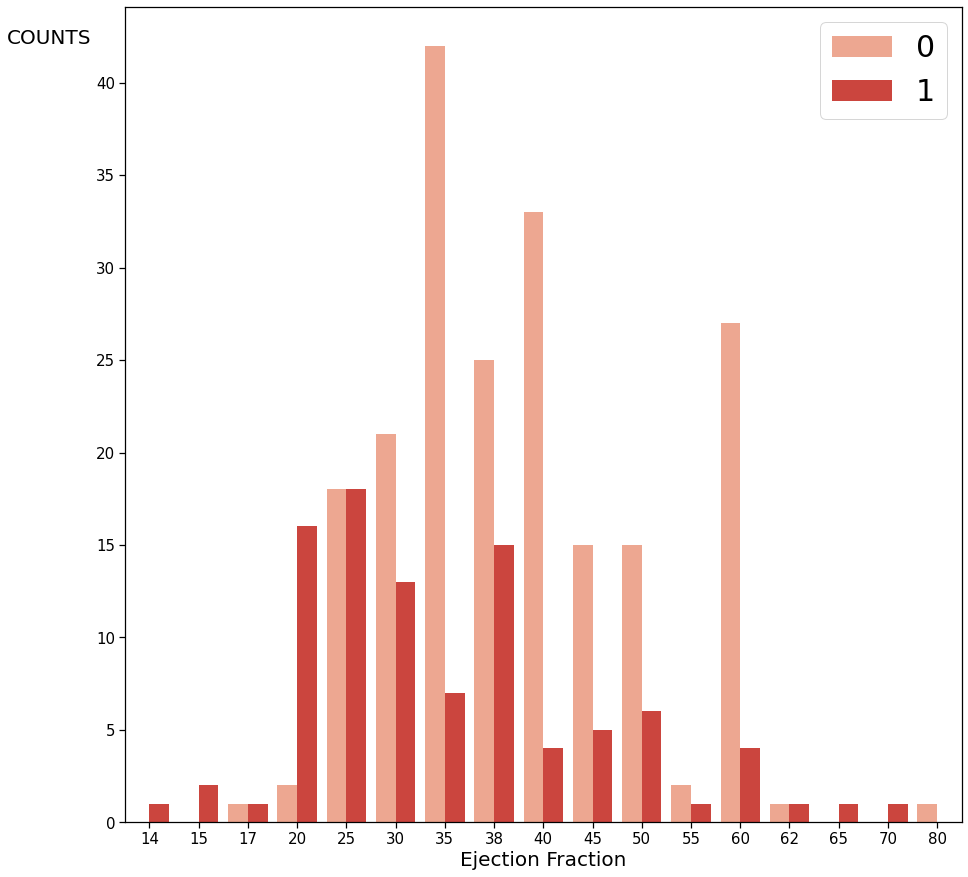

In [22]:
fig, axz = plt.subplots(figsize=(15,15))

axz = sns.countplot(x='ef', hue='DEATH_EVENT', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('Ejection Fraction', size=20)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

From what I have researched online, a normal range for ejection fraction is values between 52% to 72% for males and 54% to 74% for females. But according the visualization above, this dataset contains a lot of people who have EF below the normal values. 40% to 49% is mid-range ejection fraction: The heart’s pumping ability is slightly below normal. 39% or less is heart failure with reduced ejection fraction (HFrEF): Pumping ability is below normal. The lower the ejection fraction, the higher the risk of life-threatening complications. And that is why on **lower values of EF death events occur more frequently.**

#### 5.2.2.4 Platelets VS Death Events

Just like the discussion in the previous session, I will group the Platelets values per hundreds because the values vary up to 900. This is done to make reading the graph easier.

In [23]:
df_copy['platelets'] = pd.cut(df_copy['platelets'],[0, 100, 200, 300, 400, 500, 900])
df_copy['platelets'].value_counts()

(200, 300]    156
(300, 400]     60
(100, 200]     55
(400, 500]     13
(0, 100]        8
(500, 900]      7
Name: platelets, dtype: int64

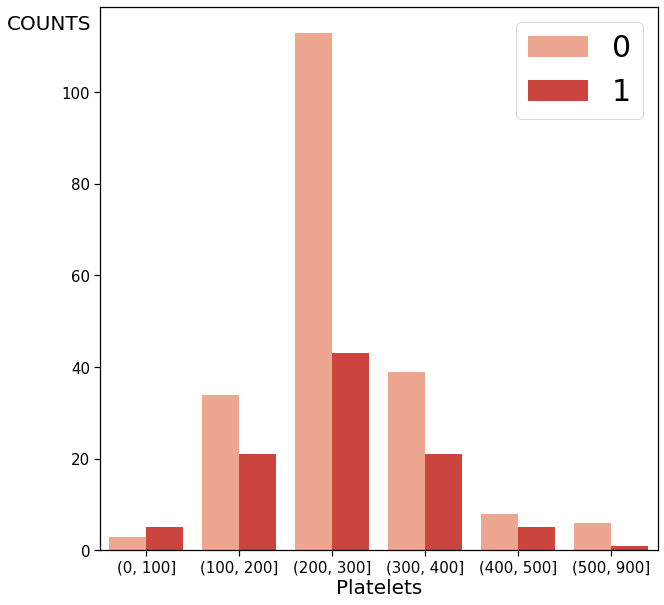

In [24]:
fig, axz = plt.subplots(figsize=(10,10))

axz = sns.countplot(x='platelets', hue='DEATH_EVENT', data=df_copy, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('Platelets', size=20)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

Based on what I have researched, The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L. Normal value ranges may vary slightly. Some labs use different measurements or may test different specimens. In this data, the unit for placelets is in kilo/L. People who has placelets range below the normal values have a higher chance to fail on heart failure/heart attack.

#### 5.2.2.5 Serum Creatinine VS Death Event

In [25]:
df_copy['sCre'] = pd.cut(df_copy['sCre'], [0, 1, 2, 3, 10])
df_copy['sCre'].value_counts()

(1, 2]     134
(0, 1]     131
(2, 3]      20
(3, 10]     14
Name: sCre, dtype: int64

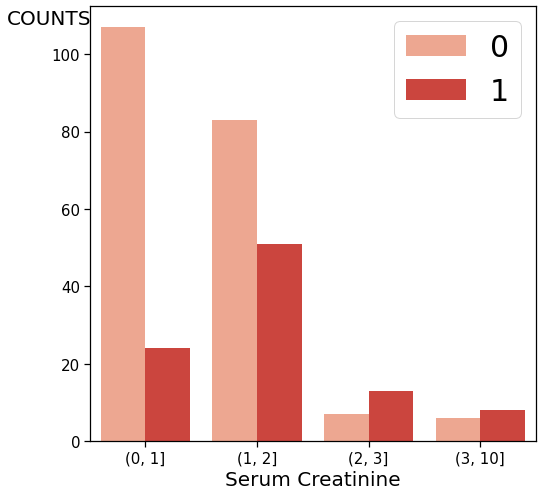

In [26]:
fig, axz = plt.subplots(figsize=(8,8))

axz = sns.countplot(x='sCre', hue='DEATH_EVENT', data=df_copy, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('Serum Creatinine', size=20)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

#### 5.2.2.6 Serum Sodium VS Death Event

In [27]:
df_copy['sSod'] = pd.cut(df_copy['sSod'], [110, 120, 130, 140, 150])
df_copy['sSod'].value_counts()

(130, 140]    235
(140, 150]     42
(120, 130]     20
(110, 120]      2
Name: sSod, dtype: int64

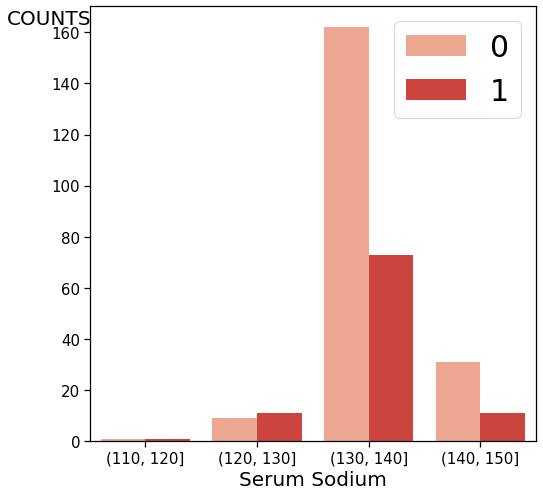

In [28]:
fig, axz = plt.subplots(figsize=(8,8))

axz = sns.countplot(x='sSod', hue='DEATH_EVENT', data=df_copy, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('Serum Sodium', size=20)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

# **VI. DATA PREPROCESSING**

In this section I will perform feature selection for making the machinge learning models, and then making the inference model, splitting the data into train and test data, scale the numerical features and then concat the features back. **In this section, I won't be performing any outliers handling because this dataset is a medical dataset**. In a medical test data, the existing data is actual data and indeed in the medical world there are unexpected anomalies and it is precisely these anomalies that are needed to be used for machine learning model lessons.

## 6.1 Feature Selection

In this section, I will do a feature selection based on the correlation value to the target to make the machine learning models.

And now, I will change the categorical features dtypes to `str`.

In [29]:
df['anaemia'] = df['anaemia'].apply(str)
df['diabetes'] = df['diabetes'].apply(str)
df['hbp'] = df['hbp'].apply(str)
df['sex'] = df['sex'].apply(str)
df['smoking'] = df['smoking'].apply(str)

Here, I am separating the numerical and categorical features and make it into a list.

In [30]:
num_cols_for_feature_select = df.select_dtypes(include=np.number).columns.to_list()
cat_cols_for_feature_select = df.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_cols_for_feature_select)
print('Categorical Columns:', cat_cols_for_feature_select)

Numerical Columns: ['age', 'cpk', 'ef', 'platelets', 'sCre', 'sSod', 'time', 'DEATH_EVENT']
Categorical Columns: ['anaemia', 'diabetes', 'hbp', 'sex', 'smoking']


After that, I change it into a dataframe again.

In [31]:
df_num = df[num_cols_for_feature_select]
df_car = df[cat_cols_for_feature_select]
df_car_targ = df_num['DEATH_EVENT']

df_num.drop(columns='DEATH_EVENT', inplace=True)
df_num

C:\Users\alexa\AppData\Local\Temp\ipykernel_9612\4169955950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(columns='DEATH_EVENT', inplace=True)


,age,cpk,ef,platelets,sCre,sSod,time
0,42.0,250,15,213.00000,1.3,136,65
1,46.0,168,17,271.00000,2.1,124,100
2,65.0,160,20,327.00000,2.7,116,8
3,53.0,91,20,418.00000,1.4,139,43
4,50.0,582,20,279.00000,1.0,134,186
...,...,...,...,...,...,...,...
294,63.0,122,60,267.00000,1.2,145,147
295,45.0,308,60,377.00000,1.0,136,186
296,70.0,97,60,220.00000,0.9,138,186
297,53.0,446,60,263.35803,1.0,139,215


In [32]:
df_car

,anaemia,diabetes,hbp,sex,smoking
0,1,1,0,0,0
1,0,1,1,0,0
2,1,1,0,0,0
3,1,0,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
294,1,1,0,1,0
295,0,1,1,1,0
296,0,0,1,1,0
297,1,0,1,1,0


### 6.1.2 Numerical Features

Next, I wll plot the heatmap to see the correlation of all numerical features to `DEATH_EVENT`.

<AxesSubplot:>

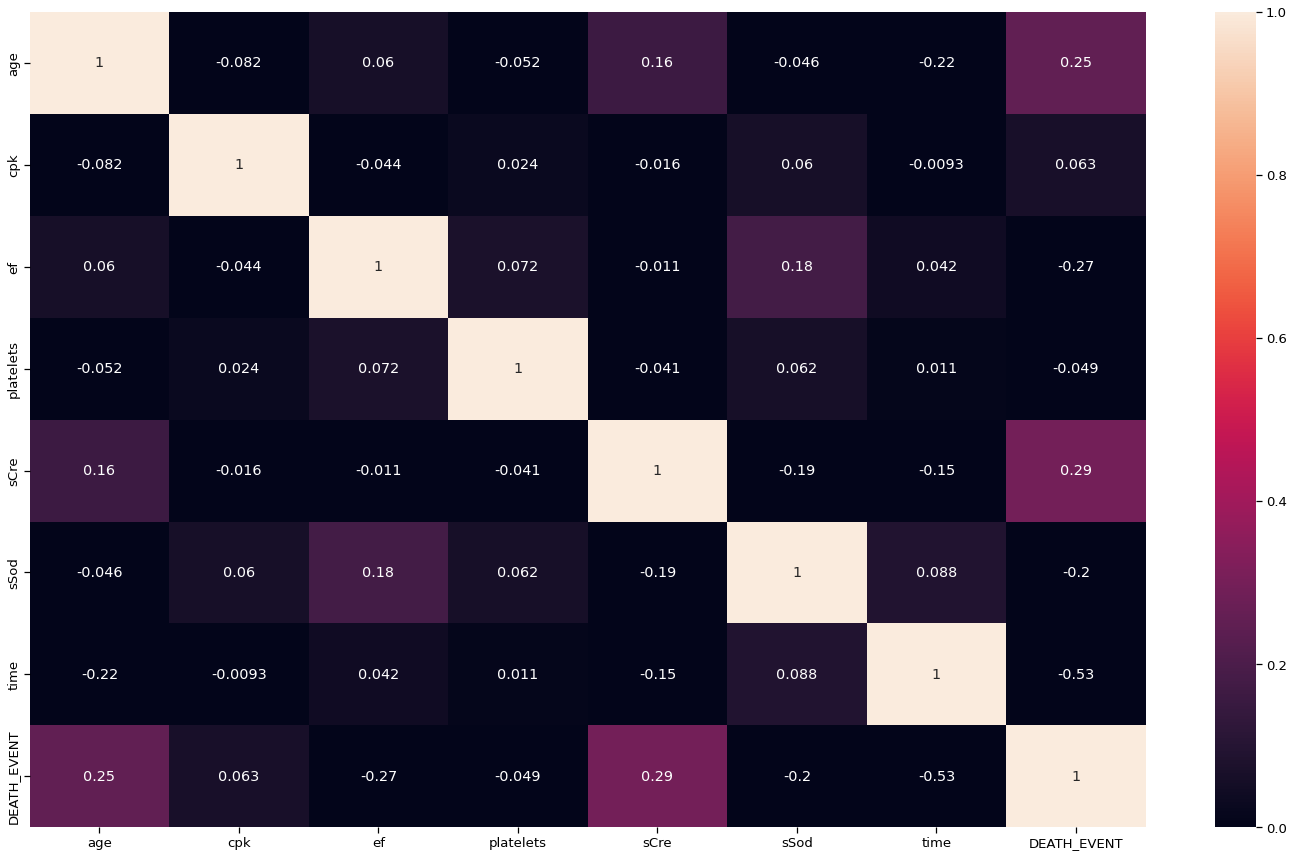

In [33]:
# Setting figure size
fig = plt.figure(figsize = (25, 15))
# Sets heatmap plot
sns.heatmap(df.corr(),
            vmin = 0,
            vmax = 1,
            annot = True)

Based on the heatmap above, it can be seen that `age` and `sCre` are the features that highest correlation value to `DEATH_EVENT`. Therefore, those 2 numerical features are going to be used to make my machine learning models. But this is not finalized, the finalization features will be decided after analyzing the categorical features.

### 6.1.3 Categorical Features

To check the correlation of categorical features, I will use Chi-Square Test to `DEATH_EVENT`. For a little bit of context, a Chi-square test is a hypothesis testing method. Two common Chi-square tests involve checking if observed frequencies in one or more categories match expected frequencies.

In [34]:
# Score function Chi2 tells the feature to be selected using Chi Square
# Defining chi square
test = SelectKBest(score_func=chi2, k=4)
# fitting shi square calculation
fit = test.fit(df_car, df_car_targ)
# Showing score
fit.scores_

array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
       3.23468288e-02])

In [35]:
# Rounding values
np.round_(fit.scores_)

array([1., 0., 1., 0., 0.])

And below is the result of the Chi-square test value.

In [36]:
# Fitting score into categorical features
chi = pd.Series(fit.scores_)
chi.index = df_car.columns
chi.sort_values(ascending=False)

hbp         1.221539
anaemia     0.746593
smoking     0.032347
sex         0.001956
diabetes    0.000657
dtype: float64

As it can be seen from above, high blood pressure and anemia are the most related categorical features to `DEATH_EVENT`. So, I will be using these categorical features to build the maching learning model.

Alright, now it is time for finalization of features that I am going to use for the machinge learning model. There are 4 fixed features, which is `age`, `anaemia`, `hbp`, and `sCre`. In my opinion, I still need more features to make the machine learning models. From the numerical features, I will add more features which is `cpk`, `ef`, `sSod`. Why so? Alright, `cpk` stands for Creatine phosphokinase and it is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. So, basically, `cpk` in reality have some correlation to the heart. That is also apllied to `anaemia` and `hbp`. Those 2 features is about the level of hemoglobin in the blood and also blood pressure. `ef` stands for ejection fraction. Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. Obviously, that `ef` is actually correlated  to `DEATH_EVENT`. And `sSod` stands for serum sodium, it also according to my research is correlated to the heart of a human. Then, I will also add `diabetes` and `smoking` from the categorical features because people who have a history of diabetes can interfere with heart health. And again obviously `smoking` will damage our lungs which make the oxygen carried in the blood worse than healthier people.

So, the features that I am going to use are `age`, `anaemia`, `cpk`, `diabetes`, `ef`, `hbp`, `sCre`, `sSod`, `smoking`, and `time`.

## 6.2 Inference Model

In this section, I am making an inference model to test out the models that I am going to make later.

In [37]:
data_inf = df.sample(5, random_state=1)
data_inf

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT
173,70.0,1,75,0,35,0,223.0,2.7,138,1,1,54,0
287,53.0,1,1808,0,60,1,249.0,0.7,138,1,1,106,0
51,45.0,0,582,1,38,0,302.0,0.9,140,0,0,244,0
146,55.0,0,2017,0,25,0,314.0,1.1,138,1,0,214,1
214,75.0,1,203,1,38,1,283.0,0.6,131,1,1,74,0


In [38]:
data_train_test = df.drop(data_inf.index)
data_train_test

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213.00000,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271.00000,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418.00000,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279.00000,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267.00000,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377.00000,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220.00000,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263.35803,1.0,139,1,0,215,0


And then resetting the original dataset and inference model index.

In [39]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [40]:
data_inf_final = data_inf.drop(['platelets','sex','DEATH_EVENT'], axis=1)

## 6.3 Splitting The Data

In this section, I will split the data into to variables which is X and y. `y` is my model target which is `DEATH_EVENT`.

In [41]:
X = data_train_test.drop(columns='DEATH_EVENT', axis=1)
y = data_train_test['DEATH_EVENT']
X

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time
0,42.0,1,250,1,15,0,213.00000,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271.00000,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418.00000,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279.00000,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
289,63.0,1,122,1,60,0,267.00000,1.2,145,1,0,147
290,45.0,0,308,1,60,1,377.00000,1.0,136,1,0,186
291,70.0,0,97,0,60,1,220.00000,0.9,138,1,0,186
292,53.0,1,446,0,60,1,263.35803,1.0,139,1,0,215


Next step that I will perform is, splitting `X` into two subset data which is `train` and `test`. The portion is 80 % train and 20 % test.

In [42]:
train, test = train_test_split(data_train_test, test_size=0.2, stratify=y, random_state=39)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (235, 13)
Test size:  (59, 13)


Because in `train` and `test` still contains unused features, I will drop the unused features. 

In [43]:
train = train.drop(['platelets','sex'], axis=1)
test = test.drop(['platelets','sex'], axis=1)
train

,age,anaemia,cpk,diabetes,ef,hbp,sCre,sSod,smoking,time,DEATH_EVENT
214,85.0,0,212,0,38,0,0.9,136,0,187,0
3,53.0,1,91,0,20,1,1.4,139,0,43,1
20,72.0,1,328,0,30,1,1.7,138,1,88,1
34,70.0,0,835,0,35,1,0.8,133,0,145,0
218,58.0,0,132,1,38,1,1.0,139,0,230,0
...,...,...,...,...,...,...,...,...,...,...,...
202,55.0,0,7861,0,38,0,1.1,136,0,6,1
92,85.0,1,102,0,60,0,3.2,138,0,94,0
231,60.0,1,754,1,40,1,1.2,126,0,91,0
261,50.0,0,245,0,45,1,1.0,133,0,215,0


In [44]:
X_train = train.drop(columns='DEATH_EVENT')
y_train = train['DEATH_EVENT']

X_test = test.drop(columns='DEATH_EVENT')
y_test = test['DEATH_EVENT']

### 6.3.1 Splitting The Numerical and Categorical Features

Splitting between numerical and categorical features needs to be done because I want to scale the numerical features. Fortunately, the categorical features is already represented in numerical values, so I won't be needing any encoding the categorical features.

In [45]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['age', 'cpk', 'ef', 'sCre', 'sSod', 'time']
Categorical Features: ['anaemia', 'diabetes', 'hbp', 'smoking']


In [46]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 6.4 Scaling Numerical Features

I will scale the numerical features by using MinMaxScaler because the numerical features are skewed. You may ask why don't I handle the outliers in those numerical features, the answer is, in my opinion, those outliers don't need to handled because it will not represent the actual fact of the data and doesn't inline with the data context. In reality, these outliers are real data from sick people, Instead, I need this sick person's data to provide the best pattern for the machine learning model that I will create.

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.81818182, 0.02411329, 0.41818182, 0.04494382, 0.65714286,
        0.66788321],
       [0.23636364, 0.00867568, 0.09090909, 0.1011236 , 0.74285714,
        0.14233577],
       [0.58181818, 0.03891299, 0.27272727, 0.13483146, 0.71428571,
        0.30656934],
       ...,
       [0.36363636, 0.09326359, 0.45454545, 0.07865169, 0.37142857,
        0.31751825],
       [0.18181818, 0.02832355, 0.54545455, 0.05617978, 0.57142857,
        0.77007299],
       [0.54545455, 0.00586884, 0.45454545, 0.13483146, 0.65714286,
        0.25912409]])

## 6.5 Concatenating The Features

After scaling the numerical features, I will concantenate all those features back in one piece.

In [48]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.8181818181818181, 0.024113294207706047, 0.4181818181818182,
        ..., '0', '0', '0'],
       [0.23636363636363633, 0.008675682572084715, 0.09090909090909094,
        ..., '0', '1', '0'],
       [0.5818181818181818, 0.038912988007144676, 0.2727272727272727,
        ..., '0', '1', '1'],
       ...,
       [0.36363636363636354, 0.09326358764991069, 0.4545454545454546,
        ..., '1', '1', '0'],
       [0.18181818181818177, 0.028323551926511863, 0.5454545454545454,
        ..., '0', '1', '0'],
       [0.5454545454545454, 0.0058688440928808365, 0.4545454545454546,
        ..., '0', '0', '0']], dtype=object)

In [49]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9
0,0.818182,0.024113,0.418182,0.044944,0.657143,0.667883,0,0,0,0
1,0.236364,0.008676,0.090909,0.101124,0.742857,0.142336,1,0,1,0
2,0.581818,0.038913,0.272727,0.134831,0.714286,0.306569,1,0,1,1
3,0.545455,0.103598,0.363636,0.033708,0.571429,0.514599,0,0,1,0
4,0.327273,0.013907,0.418182,0.05618,0.742857,0.824818,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
230,0.272727,1.0,0.418182,0.067416,0.657143,0.007299,0,0,0,0
231,0.818182,0.010079,0.818182,0.303371,0.714286,0.328467,1,0,0,0
232,0.363636,0.093264,0.454545,0.078652,0.371429,0.317518,1,1,1,0
233,0.181818,0.028324,0.545455,0.05618,0.571429,0.770073,0,0,1,0


In [50]:
y_train

214    0
3      1
20     1
34     0
218    0
      ..
202    1
92     0
231    0
261    0
58     0
Name: DEATH_EVENT, Length: 235, dtype: int64

## 6.6 Imbalanced Target Data Handling

As I have mentioned in the beginning of EDA, the classes in the target is imbalanced. therefore to overcome that problem, I will use SMOTENC to resampling the data and make the classes in the target balanced.

In [51]:
# indeces of the columns of categorical variables
smnc = SMOTENC(sampling_strategy='auto', random_state=1, categorical_features=[6,7,8,9])

In [52]:
# Resampling fit
X_train_final_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

In [53]:
# Showing counter values
counter = Counter(y_train_smnc)
print(counter)

Counter({0: 159, 1: 159})


# **VII. MACHINE LEARNING MODELS**

In this section, I will make a random forest model and AdaBoost model. To analyze the models performance, I will use recall score from each model and do a cross validation with scoring system of 'accuracy'. I will explain it later in this section.

## 7.1 Random Forest

### 7.1.1 Model Definition

In [54]:
rf_model = RandomForestClassifier(criterion = 'gini',
                            max_depth = 230,
                            max_features = 'sqrt',
                            min_samples_split = 6,
                            min_samples_leaf = 8,
                            n_estimators = 50,
                            random_state=1)

### 7.1.2 Model Training

In [55]:
rf_model.fit(X_train_final_smnc, y_train_smnc)

RandomForestClassifier(max_depth=230, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=50, random_state=1)

### 7.1.3 Model Evaluation

In [56]:
y_pred_train_rf = rf_model.predict(X_train_final_smnc)
y_pred_test_rf = rf_model.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_rf))

Accuracy Score Train: 0.9245283018867925


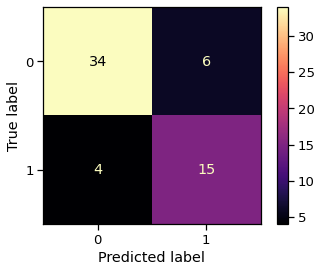

In [57]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot(cmap='magma')
plt.show()

Okay, now I will explain how to interpret the image shown above. The image above is called the confusion matrix. Please don't get confused, I am explaining the definition here. 

The confusion matrix is ​​divided into 4 parts, namely **true positive, false positive, false negative, and true negative**. The Y axis of the confusion matrix is ​​the original or true label, while the X axis of the confusion matrix is ​​the class prediction result. 

True positive is a **positive label, or in this case the label 0 represents 'Not Dead / Alive', which the model predicts as a positive label. Then, the false positive is the 'Not Deadth / Alive' that the model predicts as the 'Dead / Deceased'. Then, false negative is the 'Dead / Deceased' class which is predicted as 'Not Dead / Alive' by the model and the last is true negative where the 'Dead / Deceased' label is predicted by the model as the 'Dead / Deceased' label**.

Phew, it sounds scary isn't it? We are talking about death and predicting if someone going to be dead or not which is kind of funny to me.

In [58]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_rf, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train_smnc, y_pred_train_rf))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test_rf))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.91      0.94      0.93       159

    accuracy                           0.92       318
   macro avg       0.93      0.92      0.92       318
weighted avg       0.93      0.92      0.92       318

Accuracy Score Train:  0.9245283018867925


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.71      0.79      0.75        19

    accuracy                           0.83        59
   macro avg       0.80      0.82      0.81        59
weighted avg       0.84      0.83      0.83        59

Accuracy Score Test:  0.8305084745762712


Alright, moving on to the next part. Above is what is so called as classification report. The report consists of precision, recall, and f1-score, support, and accuracy. Relax, I am going to explain the context here. So what are they actually?

- Accuracy is the number of correctly predicted data points out of all the data points.
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
- F1 Score is the weighted average of Precision and Recall.

Then which metric will be emphasized or used as the main metric as an evaluator of the model? Yes, the answer is recall. Why recall you may ask? As I have mentioned above, recall is the ratio of correctly predicted positive observation to the all observation in actual class. Here is the formula of recall :

**Recall = TruePositives / (TruePositives + FalseNegatives)**

What I want to emphasize here is the false negative. What does false negative mean here? In the context of this data, a false negative means a person who has had a heart attack but is predicted to survive. Imagine if you are a patient with a history of or are having a heart attack, then your trusted doctor (machine learning model that I created) says that you are still alive. Hearing the good news, your family held a thanksgiving, but suddenly before or during or after the thanksgiving, you died. The fact is that the doctor was not at fault for your death. But neither should a doctor give wrong predictions. Therefore, false negatives here are very dangerous.

Therefore I will use recall as an evaluation metric of the model that has been used.



The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be DEAD by the model, 70 % were correct.
- Recall : of all people that is DEAD, the model only predicted this outcome correctly for 35% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the random forest model that has been made has a score of 0.75 of 1.00. A good model but still needs some improvements.

Based on the F-1 Score, it can indicate that my random forest model does not have good accuracy. This can be caused by several things, such as the lack of data, insufficient data range and also the data pattern of the features used. But, in this case mostly because the lack of data. This data only has almost 300 entries.

Note:
- Support : These values simply tell us how many poeple belonged to each class in the test dataset. We can see that among the people in the test dataset, 40 people are alive and 19 people are dead.

To make it more consistent, I will do a cross validation check to train and test prediction. Cross-validation (CV) is a statistical method that can be used to evaluate the performance of a model or algorithm where the data is separated into two subsets, namely learning process data and validation / evaluation data.

In [59]:
kfold = StratifiedKFold(n_splits=10)
rf_train_cross_val = cross_val_score(rf_model, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
rf_test_cross_val = cross_val_score(rf_model, X_test_final, y_test, cv=kfold, scoring='accuracy')

print('Train Accuracy - All - Cross Validation  : ', rf_train_cross_val)
print('Train Accuracy - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('Train Accuracy - Std - Cross Validation  : ', rf_train_cross_val.std())
print('Train Accuracy - Range of Train Set       : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))
print("\n")
print('==='*20)
print("\n")
print('Test Accuracy - All - Cross Validation  : ', rf_test_cross_val)
print('Test Accuracy - Mean - Cross Validation : ', rf_test_cross_val.mean())
print('Test Accuracy - Std - Cross Validation  : ', rf_test_cross_val.std())
print('Test Accuracy - Range of Train Set       : ', (rf_test_cross_val.mean()-rf_test_cross_val.std()) , '-', (rf_test_cross_val.mean()+rf_test_cross_val.std()))

Train Accuracy - All - Cross Validation  :  [0.96875    0.875      0.8125     0.875      0.875      0.90625
 0.875      0.875      0.87096774 0.77419355]
Train Accuracy - Mean - Cross Validation :  0.870766129032258
Train Accuracy - Std - Cross Validation  :  0.04865266504331348
Train Accuracy - Range of Train Set       :  0.8221134639889446 - 0.9194187940755715




Test Accuracy - All - Cross Validation  :  [0.83333333 0.66666667 0.83333333 1.         0.66666667 0.66666667
 0.83333333 0.83333333 0.66666667 0.8       ]
Test Accuracy - Mean - Cross Validation :  0.78
Test Accuracy - Std - Cross Validation  :  0.10561986345169909
Test Accuracy - Range of Train Set       :  0.674380136548301 - 0.8856198634516991


From 10 folds of cross validation, the average train prediction accuracy is 0.87 which is 5% lower than the accuracy written in classification report. The average test prediction accuracy is 0.78 which is also 5% lower than the accuracy written in classification report. Both of the train and test accuracy is not significantly different.

## 7.3 AdaBoost Classifier

### 7.3.1 Model Definition

In [60]:
abc = AdaBoostClassifier(random_state=1,
                    learning_rate=0.5,
                    n_estimators=10,
                    algorithm='SAMME')

### 7.3.2 Model Training

In [61]:
abc.fit(X_train_final_smnc, y_train_smnc)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=10,
                   random_state=1)

### 7.3.1 Model Evaluation

In [62]:
y_pred_train_abc = abc.predict(X_train_final_smnc)
y_pred_test_abc = abc.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train_smnc, y_pred_train_abc))

Accuracy Score Train: 0.8805031446540881


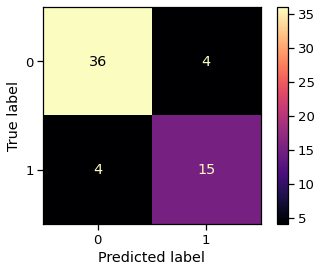

In [63]:
cm = confusion_matrix(y_test, y_pred_test_abc, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the AdaBoost model that has been made, the confusion matrix obtained says that **there are 36 data that are predicted to be ALIVE, there are 4 data ALIVE that are predicted to be DEAD. Then there are 4 data of DEAD which are predicted as ALIVE and 15 data of DEAD which are predicted to be correct as DEAD.**

In [64]:
print("="*27,"TRAINING","="*27)
print(classification_report(y_train_smnc, y_pred_train_abc, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train_smnc, y_pred_train_abc))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_abc, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test_abc))

=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       159
           1       0.91      0.84      0.88       159

    accuracy                           0.88       318
   macro avg       0.88      0.88      0.88       318
weighted avg       0.88      0.88      0.88       318

Accuracy Score Train:  0.8805031446540881


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.79      0.79      0.79        19

    accuracy                           0.86        59
   macro avg       0.84      0.84      0.84        59
weighted avg       0.86      0.86      0.86        59

Accuracy Score Test:  0.864406779661017


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be DEAD by the model, 79 % were correct.
- Recall : of all people that is DEAD, the model only predicted this outcome correctly for 79 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the support vector machine model that has been made has a score of 0.79 of 1.00. Now, it is better than the random forest model.

In [65]:
kfold = StratifiedKFold(n_splits=10)
abc_train_cross_val = cross_val_score(abc, X_train_final_smnc, y_train_smnc, cv=kfold, scoring='accuracy')
abc_test_cross_val = cross_val_score(abc, X_test_final, y_test, cv=kfold, scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', abc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', abc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', abc_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (abc_train_cross_val.mean()-abc_train_cross_val.std()) , '-', (abc_train_cross_val.mean()+abc_train_cross_val.std()))
print("\n")
print('==='*20)
print("\n")
print('Test Accuracy - All - Cross Validation  : ', abc_test_cross_val)
print('Test Accuracy - Mean - Cross Validation : ', abc_test_cross_val.mean())
print('Test Accuracy - Std - Cross Validation  : ', abc_test_cross_val.std())
print('Test Accuracy - Range of Train Set       : ', (abc_test_cross_val.mean()-abc_test_cross_val.std()) , '-', (abc_test_cross_val.mean()+abc_test_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.9375     0.875      0.84375    0.78125    0.78125    0.90625
 0.90625    0.90625    0.87096774 0.77419355]
Accuracy - Mean - Cross Validation :  0.858266129032258
Accuracy - Std - Cross Validation  :  0.05724386466358914
Accuracy - Range of Train Set       :  0.8010222643686689 - 0.9155099936958471




Test Accuracy - All - Cross Validation  :  [1.         0.66666667 0.83333333 0.83333333 0.83333333 0.66666667
 0.66666667 0.66666667 0.83333333 0.8       ]
Test Accuracy - Mean - Cross Validation :  0.7799999999999999
Test Accuracy - Std - Cross Validation  :  0.10561986345169909
Test Accuracy - Range of Train Set       :  0.6743801365483009 - 0.885619863451699


From 10 folds of cross validation, the average train prediction accuracy is 0.85 which is 3 % lower than the accuracy written in classification report. The average test prediction accuracy is 0.78 which is also 8 % lower than the accuracy written in classification report.

To summarize the fitting type of all models that I have created, here is a quick recap. I am determining the fitting type by using accuracy from each trained and tested models.

| Machine Learning Model | Train Accuracy | Test Accuracy | Fit Type |
|:----------------------:|:--------------:|:-------------:|:--------:|
| Random Forest          |      0.92      |      0.83     | Overfit  |
| AdaBoost Classifier    |      0.88      |      0.86     | Just fit |


# **X. MODEL INFERENCE TESTING**

In this section, I will try to predict the inference model using the model that I have made.

In [68]:
data_inf_final

,age,anaemia,cpk,diabetes,ef,hbp,sCre,sSod,smoking,time
0,70.0,1,75,0,35,0,2.7,138,1,54
1,53.0,1,1808,0,60,1,0.7,138,1,106
2,45.0,0,582,1,38,0,0.9,140,0,244
3,55.0,0,2017,0,25,0,1.1,138,0,214
4,75.0,1,203,1,38,1,0.6,131,1,74


In [69]:
inf_num = data_inf_final[num_columns]
inf_cat = data_inf_final[cat_columns]

In [70]:
inf_num_scaled = scaler.transform(inf_num)
inf_num_scaled

array([[0.54545455, 0.00663435, 0.36363636, 0.24719101, 0.71428571,
        0.18248175],
       [0.23636364, 0.22773667, 0.81818182, 0.02247191, 0.71428571,
        0.37226277],
       [0.09090909, 0.07131921, 0.41818182, 0.04494382, 0.77142857,
        0.87591241],
       [0.27272727, 0.25440163, 0.18181818, 0.06741573, 0.71428571,
        0.76642336],
       [0.63636364, 0.02296504, 0.41818182, 0.01123596, 0.51428571,
        0.25547445]])

In [71]:
inf_final = np.concatenate([inf_num_scaled, inf_cat], axis=1)

In [74]:
y_pred_inf_rf = rf_model.predict(inf_final)
y_pred_inf_rf_df = pd.DataFrame(y_pred_inf_rf, columns=['PRED_DEATH_EVENT'])

In [75]:
pd.concat([data_inf, y_pred_inf_rf_df], axis=1)

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT,PRED_DEATH_EVENT
0,70.0,1,75,0,35,0,223.0,2.7,138,1,1,54,0,1
1,53.0,1,1808,0,60,1,249.0,0.7,138,1,1,106,0,0
2,45.0,0,582,1,38,0,302.0,0.9,140,0,0,244,0,0
3,55.0,0,2017,0,25,0,314.0,1.1,138,1,0,214,1,0
4,75.0,1,203,1,38,1,283.0,0.6,131,1,1,74,0,1


The table above is a table of prediction results based on **the random forest model** that has been made. Based on the prediction results, there were 3 entries that were incorrectly predicted.

In [72]:
y_pred_inf = abc.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['PRED_DEATH_EVENT'])

In [73]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT,PRED_DEATH_EVENT
0,70.0,1,75,0,35,0,223.0,2.7,138,1,1,54,0,1
1,53.0,1,1808,0,60,1,249.0,0.7,138,1,1,106,0,0
2,45.0,0,582,1,38,0,302.0,0.9,140,0,0,244,0,0
3,55.0,0,2017,0,25,0,314.0,1.1,138,1,0,214,1,0
4,75.0,1,203,1,38,1,283.0,0.6,131,1,1,74,0,0


The table above is a table of prediction results based on **the AdaBoost Classifier model** that has been made. Based on the prediction results, there are 2 entries that is incorrectly predicted.

# **XI. CONCLUSION**

The conclusion of the analysis that has been carried out is as follows:

1. Based on the analysis that has been made, I have succeeded in creating machine learning models to predict whether a person would die or not from a heart failure.
2. Based on the feature selection results, the numerical feature that has the highest correlation to the target is `age`. Then, the numerical feature that has the highest correlation to the target is `high_blood_pressure`.
3. The machine learning models that have created are RandomForest Classifier and AdaBoostClassifier.
4. AdaBoostClassifier model that I have made has the higher accuracy compared to RandomForest Classifier with a score of 0.86.

The suggestions I can give for projects or analysis on the topic are:

1. Try to obtain more data because the dataset used in this project is a small dataset.
2. I have tried other classifier models such as GradientBoosting and XGBoost Classifier, but it turned out not so good. So, my suggestion is to try other classifier models and try to play around with the hyperparameters.

# **XII. CONCEPTUAL PROBLEMS**

1. Apakah yang dimaksud dengan Bagging?

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

1. Bagging or bootstrap aggregating in ensemble learning is used when you want to reduce the variance value of the decision tree classifier. The bagging procedure in ensemble learning has the objective of creating several subsets of data from a randomly selected training sample with replacement, this objective is also referred to as bootstrapping. Each collection of data subsets is used to train their respective decision trees. So as a result will be obtained a model which is a combination of different models. Therefore, bagging helps reduce the value of variance from models that may be overly accurate, but only on the data being tested

2. Here are the key differences between RandomForest Classifier and AdaBoost Classifier.

    - Data sampling: Both Adaboost and Random forest use data sampling, but they use the samples differently. The bagging technique is used to sample the training data in Random Forest. The bagging technique is a data sampling technique that reduces prediction variance by generating additional data for training from the dataset using combinations with repetitions to generate multi-sets of the original data. Bagging, also known as bootstrap aggregation, is the process of randomly sampling data and replacing it. This means that some data points may be sampled more than once, while others may not be sampled at all. In AdaBoost, the training data used for training subsequent decision stumps (trees with one node and two leaves) have few data samples assigned higher weights based on miss-classification of those data set in the previous decision stump. The very fact that few data samples which are misclassified are assigned higher weights results in those data sets will get sampled repeatedly in the new data sample.

    - Tree order: In a Random forest, each decision tree is made independently of other trees. The ordering in which decision trees are created is not important at all. However, in the forest of stumps made in AdaBoost, the ordering in which decision stumps are created is important. The errors made in the first decision stump influence how the second decision stump is made and the error made in the second stump influences how the third decision stump is made.

    - Tree type: Random forest makes use of multiple full-size decision trees or multiple decision trees having different depths. On the other hand, AdaBoost makes use of what is called decision stumps. Decision stumps are decision trees with one node and two leaves.

    - Equal Weights vs Variable Weights: In a Random forest, a decision made by each tree carries equal weight. In other words, each decision tree has equal say or weight in the final decision. In AdaBoost, some decision stumps may have a higher say or weight in the final decision than the others.